### Decision Tree

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('Weather_modified.csv')
df

Outlook  Temp Humidity  Windy Play Golf
0      Rainy   Hot     High  False        No
1      Rainy   Hot     High   True        No
2   Overcast   Hot     High  False       Yes
3      Sunny  Mild     High  False       Yes
4      Sunny  Cool   Normal  False       Yes
5      Sunny  Cool   Normal   True        No
6   Overcast  Cool   Normal   True       Yes
7      Rainy  Mild     High  False        No
8      Rainy  Cool   Normal  False       Yes
9      Sunny  Mild   Normal  False       Yes
10     Rainy  Mild   Normal   True       Yes
11  Overcast  Mild     High   True       Yes
12  Overcast   Hot   Normal  False       Yes
13     Sunny  Mild     High   True        No

In [4]:
# Let's understand the type of values in each column of our dataframe 'df'.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Outlook    14 non-null     object
 1   Temp       14 non-null     object
 2   Humidity   14 non-null     object
 3   Windy      14 non-null     bool  
 4   Play Golf  14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [5]:
# Let's understand the data, how it look like.
df

Outlook  Temp Humidity  Windy Play Golf
0      Rainy   Hot     High  False        No
1      Rainy   Hot     High   True        No
2   Overcast   Hot     High  False       Yes
3      Sunny  Mild     High  False       Yes
4      Sunny  Cool   Normal  False       Yes
5      Sunny  Cool   Normal   True        No
6   Overcast  Cool   Normal   True       Yes
7      Rainy  Mild     High  False        No
8      Rainy  Cool   Normal  False       Yes
9      Sunny  Mild   Normal  False       Yes
10     Rainy  Mild   Normal   True       Yes
11  Overcast  Mild     High   True       Yes
12  Overcast   Hot   Normal  False       Yes
13     Sunny  Mild     High   True        No

In [2]:
import pandas as pd

# Provided dataset as a pandas DataFrame
data_golf = pd.DataFrame({
    'Outlook': ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Overcast', 'Overcast', 'Sunny'],
    'Temp': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'Golf Players': [25, 30, 46, 45, 52, 23, 43, 35, 38, 46, 48, 52, 44, 30]
})

# Function to calculate variance
def calculate_variance(labels):
    if len(labels) == 0:
        return 0.0
    
    variance = labels.var()
    
    return variance

# Function to calculate variance reduction for a feature
def calculate_variance_reduction(data, feature, target):
    variance_before_split = calculate_variance(data[target])
    unique_values = data[feature].unique()

    weighted_variance_after_split = 0.0
    total_instances = len(data)

    for value in unique_values:
        subset = data[data[feature] == value]
        weight = len(subset) / total_instances
        variance_after_split = calculate_variance(subset[target])
        weighted_variance_after_split += weight * variance_after_split

    variance_reduction = variance_before_split - weighted_variance_after_split
    return variance_reduction

# Calculate variance reduction for each feature
target_variable = 'Golf Players'
features = ['Outlook', 'Temp', 'Humidity', 'Windy']

for feature in features:
    reduction = calculate_variance_reduction(data_golf, feature, target_variable)
    print(f"Variance Reduction for {feature}: {reduction}")


Variance Reduction for Outlook: 9.137362637362656
Variance Reduction for Temp: -9.191208791208794
Variance Reduction for Humidity: -2.076923076923066
Variance Reduction for Windy: -4.627943485086348


In [3]:
import pandas as pd

# Provided dataset as a pandas DataFrame
data_golf = pd.DataFrame({
    'Outlook': ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Overcast', 'Overcast', 'Sunny'],
    'Temp': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'Golf Players': [25, 30, 46, 45, 52, 23, 43, 35, 38, 46, 48, 52, 44, 30]
})

# Function to calculate standard deviation
def calculate_std_dev(labels):
    if len(labels) == 0:
        return 0.0
    
    std_dev = labels.std()
    
    return std_dev

# Function to calculate standard deviation reduction for a feature
def calculate_std_dev_reduction(data, feature, target):
    std_dev_before_split = calculate_std_dev(data[target])
    unique_values = data[feature].unique()

    weighted_std_dev_after_split = 0.0
    total_instances = len(data)

    for value in unique_values:
        subset = data[data[feature] == value]
        weight = len(subset) / total_instances
        std_dev_after_split = calculate_std_dev(subset[target])
        weighted_std_dev_after_split += weight * std_dev_after_split

    std_dev_reduction = std_dev_before_split - weighted_std_dev_after_split
    return std_dev_reduction

# Calculate standard deviation reduction for each feature
target_variable = 'Golf Players'
features = ['Outlook', 'Temp', 'Humidity', 'Windy']

for feature in features:
    reduction = calculate_std_dev_reduction(data_golf, feature, target_variable)
    print(f"Std Dev Reduction for {feature}: {reduction}")


Std Dev Reduction for Outlook: 1.0734247589804138
Std Dev Reduction for Temp: -0.3418880373260702
Std Dev Reduction for Humidity: -0.10086200041392779
Std Dev Reduction for Windy: -0.10994018555484608


In [4]:
import pandas as pd

# Provided dataset as a pandas DataFrame
data_golf = pd.DataFrame({
    'Outlook': ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Overcast', 'Overcast', 'Sunny'],
    'Temp': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'Golf Players': [25, 30, 46, 45, 52, 23, 43, 35, 38, 46, 48, 52, 44, 30]
})

# Calculate total variance before split
total_variance_before_split = data_golf['Golf Players'].var()

# Calculate variance reduction for 'Outlook'
outlook_values = data_golf['Outlook'].unique()
weighted_variance_after_split = 0.0

for value in outlook_values:
    subset = data_golf[data_golf['Outlook'] == value]
    weight = len(subset) / len(data_golf)
    variance_after_split = subset['Golf Players'].var()
    weighted_variance_after_split += weight * variance_after_split

variance_reduction = total_variance_before_split - weighted_variance_after_split

print(f"Variance Reduction for 'Outlook': {variance_reduction}")


Variance Reduction for 'Outlook': 9.137362637362656


In [5]:
import pandas as pd

# Provided dataset as a pandas DataFrame
data_golf = pd.DataFrame({
    'Outlook': ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Overcast', 'Overcast', 'Sunny'],
    'Temp': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'Golf Players': [25, 30, 46, 45, 52, 23, 43, 35, 38, 46, 48, 52, 44, 30]
})

# Function to calculate variance
def calculate_variance(labels):
    if len(labels) == 0:
        return 0.0
    
    variance = labels.var()
    
    return variance

# Function to calculate variance reduction for a feature
def calculate_variance_reduction(data, feature, target):
    total_variance_before_split = calculate_variance(data[target])
    unique_values = data[feature].unique()

    weighted_variance_after_split = 0.0
    total_instances = len(data)

    for value in unique_values:
        subset = data[data[feature] == value]
        weight = len(subset) / total_instances
        variance_after_split = calculate_variance(subset[target])
        weighted_variance_after_split += weight * variance_after_split

    variance_reduction = total_variance_before_split - weighted_variance_after_split
    return variance_reduction

# Calculate variance reduction for each feature
target_variable = 'Golf Players'
features = ['Outlook', 'Temp', 'Humidity', 'Windy']

for feature in features:
    reduction = calculate_variance_reduction(data_golf, feature, target_variable)
    print(f"Variance Reduction for {feature}: {reduction}")


Variance Reduction for Outlook: 9.137362637362656
Variance Reduction for Temp: -9.191208791208794
Variance Reduction for Humidity: -2.076923076923066
Variance Reduction for Windy: -4.627943485086348


In [1]:
import pandas as pd
import math

# Provided dataset as a pandas DataFrame
data_golf = pd.DataFrame({
    'Outlook': ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Overcast', 'Overcast', 'Sunny'],
    'Temp': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'Play Golf': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
})

# Function to calculate entropy
def calculate_entropy(labels):
    total_instances = len(labels)
    
    if total_instances == 0:
        return 0.0
    
    class_counts = labels.value_counts(normalize=True)
    
    entropy = -sum(p * math.log2(p) for p in class_counts)
    
    return entropy

# Function to calculate information gain for a feature
def calculate_information_gain(data, feature, target):
    entropy_before_split = calculate_entropy(data[target])
    unique_values = data[feature].unique()

    weighted_entropy_after_split = 0.0
    total_instances = len(data)

    for value in unique_values:
        subset = data[data[feature] == value]
        weight = len(subset) / total_instances
        entropy_after_split = calculate_entropy(subset[target])
        weighted_entropy_after_split += weight * entropy_after_split

    information_gain = entropy_before_split - weighted_entropy_after_split
    return information_gain

# Calculate information gain for each feature
target_variable = 'Play Golf'
features = ['Outlook', 'Temp', 'Humidity', 'Windy']

for feature in features:
    gain = calculate_information_gain(data_golf, feature, target_variable)
    print(f"Information Gain for {feature}: {gain}")


Information Gain for Outlook: 0.2467498197744391
Information Gain for Temp: 0.029222565658954647
Information Gain for Humidity: 0.15183550136234136
Information Gain for Windy: 0.04812703040826927


In [6]:
import pandas as pd

# Provided dataset as a pandas DataFrame
data_golf = pd.DataFrame({
    'Outlook': ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Overcast', 'Overcast', 'Sunny'],
    'Temp': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'Golf Players': [25, 30, 46, 45, 52, 23, 43, 35, 38, 46, 48, 52, 44, 30]
})

# Function to calculate standard deviation
def calculate_std_dev(labels):
    if len(labels) == 0:
        return 0.0
    
    std_dev = labels.std()
    
    return std_dev

# Function to calculate standard deviation reduction for a feature
def calculate_std_dev_reduction(data, feature, target):
    total_std_dev_before_split = calculate_std_dev(data[target])
    unique_values = data[feature].unique()

    weighted_std_dev_after_split = 0.0
    total_instances = len(data)

    for value in unique_values:
        subset = data[data[feature] == value]
        weight = len(subset) / total_instances
        std_dev_after_split = calculate_std_dev(subset[target])
        weighted_std_dev_after_split += weight * std_dev_after_split

    std_dev_reduction = total_std_dev_before_split - weighted_std_dev_after_split
    return std_dev_reduction

# Calculate standard deviation reduction for each feature
target_variable = 'Golf Players'
features = ['Outlook', 'Temp', 'Humidity', 'Windy']

for feature in features:
    reduction = calculate_std_dev_reduction(data_golf, feature, target_variable)
    print(f"Std Dev Reduction for {feature}: {reduction}")


Std Dev Reduction for Outlook: 1.0734247589804138
Std Dev Reduction for Temp: -0.3418880373260702
Std Dev Reduction for Humidity: -0.10086200041392779
Std Dev Reduction for Windy: -0.10994018555484608


In [8]:
import pandas as pd

# Provided dataset as a pandas DataFrame
data_golf = pd.DataFrame({
    'Outlook': ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Overcast', 'Overcast', 'Sunny'],
    'Temp': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'Golf Players': [25, 30, 46, 45, 52, 23, 43, 35, 38, 46, 48, 52, 44, 30]
})

# Function to calculate standard deviation
def calculate_std_dev(labels):
    if len(labels) == 0:
        return 0.0
    
    std_dev = labels.std()
    
    return std_dev

# Function to calculate standard deviation reduction for a feature
def calculate_std_dev_reduction(data, feature, target):
    baseline_std_dev = calculate_std_dev(data[target])
    unique_values = data[feature].unique()

    weighted_std_dev_after_split = 0.0
    total_instances = len(data)

    for value in unique_values:
        subset = data[data[feature] == value]
        weight = len(subset) / total_instances
        std_dev_after_split = calculate_std_dev(subset[target])
        weighted_std_dev_after_split += weight * std_dev_after_split

    std_dev_reduction = baseline_std_dev - weighted_std_dev_after_split
    return std_dev_reduction

# Calculate standard deviation reduction for each feature
target_variable = 'Golf Players'
features = ['Outlook', 'Temp', 'Humidity', 'Windy']

for feature in features:
    reduction = calculate_std_dev_reduction(data_golf, feature, target_variable)
    print(f"Std Dev Reduction for {feature}: {reduction}")


Std Dev Reduction for Outlook: 1.0734247589804138
Std Dev Reduction for Temp: -0.3418880373260702
Std Dev Reduction for Humidity: -0.10086200041392779
Std Dev Reduction for Windy: -0.10994018555484608


In [11]:
import pandas as pd

# Provided dataset as a pandas DataFrame
data_golf = pd.DataFrame({
    'Outlook': ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Overcast', 'Overcast', 'Sunny'],
    'Temp': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'Golf Players': [25, 30, 46, 45, 52, 23, 43, 35, 38, 46, 48, 52, 44, 30]
})

# Function to calculate standard deviation reduction for a feature
def calculate_std_dev_reduction(data, feature, target):
    baseline_std_dev = data[target].std()
    unique_values = data[feature].unique()

    weighted_std_dev_after_split = 0.0
    total_instances = len(data)

    for value in unique_values:
        subset = data[data[feature] == value]
        weight = len(subset) / total_instances
        std_dev_after_split = subset[target].std()
        weighted_std_dev_after_split += weight * std_dev_after_split

    std_dev_reduction = baseline_std_dev - weighted_std_dev_after_split
    return std_dev_reduction

# Calculate standard deviation reduction for each feature
target_variable = 'Golf Players'
features = ['Outlook', 'Temp', 'Humidity', 'Windy']

baseline_std_dev = data_golf[target_variable].std()
print(f"Baseline Standard Deviation for 'Golf Players': {baseline_std_dev}\n")

for feature in features:
    reduction = calculate_std_dev_reduction(data_golf, feature, target_variable)
    print(f"Std Dev Reduction for {feature}: {reduction}")


Baseline Standard Deviation for 'Golf Players': 9.672948571450904

Std Dev Reduction for Outlook: 1.0734247589804138
Std Dev Reduction for Temp: -0.3418880373260702
Std Dev Reduction for Humidity: -0.10086200041392779
Std Dev Reduction for Windy: -0.10994018555484608


In [6]:
df['Outlook']!= 'Overcast'

0      True
1      True
2     False
3      True
4      True
5      True
6     False
7      True
8      True
9      True
10     True
11    False
12    False
13     True
Name: Outlook, dtype: bool

In [7]:
df_no = df[df['Outlook']!= 'Overcast']
df_no

Outlook  Temp Humidity  Windy Play Golf
0    Rainy   Hot     High  False        No
1    Rainy   Hot     High   True        No
3    Sunny  Mild     High  False       Yes
4    Sunny  Cool   Normal  False       Yes
5    Sunny  Cool   Normal   True        No
7    Rainy  Mild     High  False        No
8    Rainy  Cool   Normal  False       Yes
9    Sunny  Mild   Normal  False       Yes
10   Rainy  Mild   Normal   True       Yes
13   Sunny  Mild     High   True        No

In [8]:
df_o = df[df['Outlook']== 'Overcast']
df_o

Outlook  Temp Humidity  Windy Play Golf
2   Overcast   Hot     High  False       Yes
6   Overcast  Cool   Normal   True       Yes
11  Overcast  Mild     High   True       Yes
12  Overcast   Hot   Normal  False       Yes

In [9]:
df.iloc[:,-1].value_counts()

Yes    9
No     5
Name: Play Golf, dtype: int64

In [10]:
# check for missing values
df_1 = df.isnull().any()
df_1

Outlook      False
Temp         False
Humidity     False
Windy        False
Play Golf    False
dtype: bool

Now we can check the number of rows in df_1.

Now we have a clean dataframe which is ready for model building.<br>

In [11]:
# clean dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
Outlook      14 non-null object
Temp         14 non-null object
Humidity     14 non-null object
Windy        14 non-null bool
Play Golf    14 non-null object
dtypes: bool(1), object(4)
memory usage: 542.0+ bytes


## Data Preparation

There are a number of preprocessing steps we need to do before building the model. 

Firstly, note that we have both categorical and numeric features as predictors. In previous models such as linear and logistic regression, we had created **dummy variables** for categorical variables, since those models (being mathematical equations) can  process only numeric variables.

All that is not required in decision trees, since they can process categorical variables easily. However, we still need to **encode the categorical variables** into a standard format so that sklearn can understand them and build the tree. We'll do that using the ```LabelEncoder()``` class, which comes with ```sklearn.preprocessing```. 

You can read the documentation of ```LabelEncoder``` <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html">here</a>.





In [6]:
from sklearn.preprocessing import LabelEncoder
# apply Label encoder to df_categorical

le = LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

Outlook  Temp  Humidity  Windy  Play Golf
0        1     1         0      0          0
1        1     1         0      1          0
2        0     1         0      0          1
3        2     2         0      0          1
4        2     0         1      0          1

In [13]:
df = df[df['Outlook']!= 0]
df

Outlook  Temp  Humidity  Windy  Play Golf
0         1     1         0      0          0
1         1     1         0      1          0
3         2     2         0      0          1
4         2     0         1      0          1
5         2     0         1      1          0
7         1     2         0      0          0
8         1     0         1      0          1
9         2     2         1      0          1
10        1     2         1      1          1
13        2     2         0      1          0

In [14]:
# look at column types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 13
Data columns (total 5 columns):
Outlook      10 non-null int64
Temp         10 non-null int64
Humidity     10 non-null int64
Windy        10 non-null int64
Play Golf    10 non-null int64
dtypes: int64(5)
memory usage: 480.0 bytes


### Model Building and Evaluation

Let's first build a decision tree with default hyperparameters. Then we'll use cross-validation to tune them.

In [7]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [8]:
# prepare input X
X = df.iloc[:,:-1]

# prepare response variable to y
y = df.iloc[:,-1]

In [9]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train

Outlook  Temp  Humidity  Windy
5         2     0         1      1
4         2     0         1      0
2         0     1         0      0
10        1     2         1      1
11        0     2         0      1
8         1     0         1      0
9         2     2         1      0
3         2     2         0      0
1         1     1         0      1

In [18]:
y

0     0
1     0
3     1
4     1
5     0
7     0
8     1
9     1
10    1
13    0
Name: Play Golf, dtype: int64

In [19]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(criterion='entropy', max_depth=2)
dt_default.fit(X_train, y_ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X)

# Printing classification report
print(classification_report(y, y_pred_default))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.60      0.75         5

   micro avg       0.80      0.80      0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10



In [21]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y,y_pred_default))
print(accuracy_score(y,y_pred_default))

[[5 0]
 [2 3]]
0.8


<hr>

### Plotting the Decision Tree

To visualise decision trees in python, you need to install certain external libraries. You can read about the process in detail here: http://scikit-learn.org/stable/modules/tree.html

We need the ```graphviz``` library to plot a tree.

In [22]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(df.columns[:4])
features

['Outlook', 'Temp', 'Humidity', 'Windy']

**Note**:<br>
Python requires library pydot and an external software graphviz to visualize the decision tree. If you are on wondows, you'll need to specify the path for the pydot library to access dot file from graphviz.

Please read the downloadable instructions to install graphviz. For Mac users, one way is to:
- Install the python graphviz module: ```pip install graphviz```
- Then install the Graphviz software on Mac, you do this using homebrew:
    - Install homebrew: https://docs.brew.sh/Installation
    - ```brew install graphviz```

In [23]:
# If you're on windows:
# Specifing path for dot file.
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

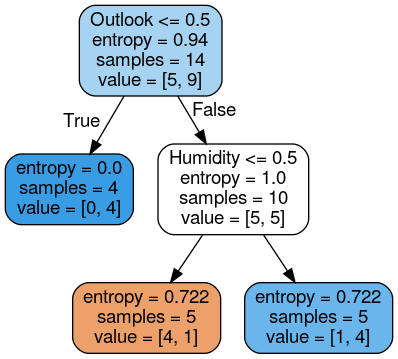

In [23]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Hyperparameter Tuning

The default tree is quite complex, and we need to simplify it by tuning the hyperparameters. 

First, let's understand the parameters in a decision tree. You can read this in the documentation using ```help(DecisionTreeClassifier)```.


- **criterion** (Gini/IG or entropy): It defines the function to measure the quality of a split. Sklearn supports “gini” criteria for Gini Index & “entropy” for Information Gain. By default, it takes the value “gini”.
- **splitter**: It defines the strategy to choose the split at each node. Supports “best” value to choose the best split & “random” to choose the best random split. By default, it takes “best” value.
- **max_features**: It defines the no. of features to consider when looking for the best split. We can input integer, float, string & None value.
    - If an integer is inputted then it considers that value as max features at each split.
    - If float value is taken then it shows the percentage of features at each split.
    - If “auto” or “sqrt” is taken then max_features=sqrt(n_features).
    - If “log2” is taken then max_features= log2(n_features).
    - If None, then max_features=n_features. By default, it takes “None” value.
- **max_depth**: The max_depth parameter denotes maximum depth of the tree. It can take any integer value or None. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. By default, it takes “None” value.
- **min_samples_split**: This tells above the minimum no. of samples reqd. to split an internal node. If an integer value is taken then consider min_samples_split as the minimum no. If float, then it shows percentage. By default, it takes “2” value.
- **min_samples_leaf**: The minimum number of samples required to be at a leaf node. If an integer value is taken then consider - -min_samples_leaf as the minimum no. If float, then it shows percentage. By default, it takes “1” value.
- **max_leaf_nodes**: It defines the maximum number of possible leaf nodes. If None then it takes an unlimited number of leaf nodes. By default, it takes “None” value.
- **min_impurity_split**: It defines the threshold for early stopping tree growth. A node will split if its impurity is above the threshold otherwise it is a leaf.<br>



<hr>

### Tuning max_depth

Let's first try to find the optimum values for max_depth and understand how the value of max_depth affects the decision tree.

Here, we are creating a dataframe with max_depth in range 1 to 80 and checking the accuracy score corresponding to each max_depth. 

To reiterate, a grid search scheme consists of:

    - an estimator (classifier such as SVC() or decision tree)
    - a parameter space
    - a method for searching or sampling candidates (optional) 
    - a cross-validation scheme, and
    - a score function (accuracy, roc_auc etc.)

In [24]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 6)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X, y)

/home/laxmi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 6)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [25]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.004390      0.002895         0.001575        0.000367   
1       0.002394      0.000563         0.001311        0.000427   
2       0.001718      0.000125         0.001494        0.001219   
3       0.001681      0.000060         0.000823        0.000017   
4       0.001692      0.000114         0.000860        0.000100   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.333333           0.666667   
1               2  {'max_depth': 2}           0.666667           1.000000   
2               3  {'max_depth': 3}           0.666667           0.666667   
3               4  {'max_depth': 4}           0.666667           1.000000   
4               5  {'max_depth': 5}           0.666667           1.000000   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.666667           0.000000  ...         0.428571        0.257539   
1           0.666667           0.333333  ...         0.714286        0.247436   
2           0.666667           0.333333  ...         0.571429        0.136775   
3           0.666667           0.333333  ...         0.642857        0.225877   
4           0.666667           0.333333  ...         0.642857        0.225877   

   rank_test_score  split0_train_score  split1_train_score  \
0                5            0.818182            0.636364   
1                1            0.909091            0.818182   
2                4            1.000000            0.818182   
3                2            1.000000            1.000000   
4                2            1.000000            1.000000   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.727273            0.818182            0.666667   
1            0.909091            0.909091            0.833333   
2            0.909091            0.909091            0.916667   
3            1.000000            1.000000            1.000000   
4            1.000000            1.000000            1.000000   

   mean_train_score  std_train_score  
0          0.733333         0.075210  
1          0.875758         0.041105  
2          0.910606         0.057576  
3          1.000000         0.000000  
4          1.000000         0.000000  

[5 rows x 21 columns]

Now let's visualize how train and test score changes with max_depth.

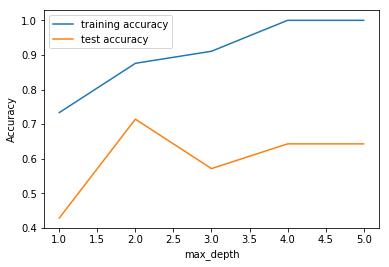

In [26]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


You can see that as we increase the value of max_depth, both training and test score increase till about max-depth = 10, after which the test score gradually reduces. Note that the scores are average accuracies across the 5-folds. 

Thus, it is clear that the model is overfitting the training data if the max_depth is too high. Next, let's see how the model behaves with other hyperparameters.

<hr>

### Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** indicates the minimum number of samples required to be at a leaf.<br>

So if the values of min_samples_leaf is less, say 5, then the will be constructed even if a leaf has 5, 6 etc. observations (and is likely to overfit).<br>

Let's see what will be the optimum value for min_samples_leaf.

In [27]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(1, 10, 1)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X, y)

/home/laxmi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [28]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.002576      0.000779         0.001602        0.000610   
1       0.002114      0.000253         0.001104        0.000260   
2       0.002176      0.001064         0.000933        0.000174   
3       0.001746      0.000102         0.000812        0.000003   
4       0.001683      0.000099         0.000880        0.000044   

  param_min_samples_leaf                   params  split0_test_score  \
0                      1  {'min_samples_leaf': 1}           0.666667   
1                      2  {'min_samples_leaf': 2}           0.333333   
2                      3  {'min_samples_leaf': 3}           0.333333   
3                      4  {'min_samples_leaf': 4}           0.333333   
4                      5  {'min_samples_leaf': 5}           0.666667   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           1.000000           0.666667           0.333333  ...   
1           0.666667           0.666667           0.000000  ...   
2           1.000000           0.666667           0.000000  ...   
3           1.000000           0.666667           0.000000  ...   
4           1.000000           0.666667           0.666667  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.642857        0.225877                3            1.000000   
1         0.500000        0.327327                9            0.818182   
2         0.571429        0.386859                7            0.818182   
3         0.571429        0.386859                7            0.818182   
4         0.785714        0.159719                1            0.636364   

   split1_train_score  split2_train_score  split3_train_score  \
0            1.000000            1.000000            1.000000   
1            0.818182            0.909091            0.818182   
2            0.818182            0.727273            0.818182   
3            0.636364            0.727273            0.818182   
4            0.636364            0.636364            0.727273   

   split4_train_score  mean_train_score  std_train_score  
0            1.000000          1.000000         0.000000  
1            0.833333          0.839394         0.035339  
2            0.833333          0.803030         0.038331  
3            0.666667          0.733333         0.075210  
4            0.666667          0.660606         0.035339  

[5 rows x 21 columns]

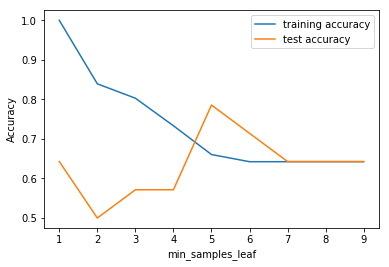

In [29]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

You can see that at low values of min_samples_leaf, the tree gets a bit overfitted. At values > 100, however, the model becomes more stable and the training and test accuracy start to converge.

<hr>

### Tuning min_samples_split

The hyperparameter **min_samples_split** is the minimum no. of samples required to split an internal node. Its default value is 2, which means that even if a node is having 2 samples it can be furthur divided into leaf nodes.

In [30]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(2, 5, 1)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X, y)

/home/laxmi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(2, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [31]:

# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.002396      0.000655         0.001298        0.000372   
1       0.002649      0.000655         0.001388        0.000566   
2       0.002297      0.001012         0.000889        0.000097   

  param_min_samples_split                    params  split0_test_score  \
0                       2  {'min_samples_split': 2}           0.666667   
1                       3  {'min_samples_split': 3}           0.666667   
2                       4  {'min_samples_split': 4}           0.666667   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           1.000000           0.666667           0.333333  ...   
1           0.666667           0.666667           0.333333  ...   
2           0.666667           0.666667           0.333333  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.642857        0.225877                1            1.000000   
1         0.571429        0.136775                2            1.000000   
2         0.571429        0.136775                2            0.909091   

   split1_train_score  split2_train_score  split3_train_score  \
0            1.000000            1.000000            1.000000   
1            0.818182            0.909091            0.909091   
2            0.818182            0.909091            0.909091   

   split4_train_score  mean_train_score  std_train_score  
0            1.000000          1.000000         0.000000  
1            0.916667          0.910606         0.057576  
2            0.916667          0.892424         0.037237  

[3 rows x 21 columns]

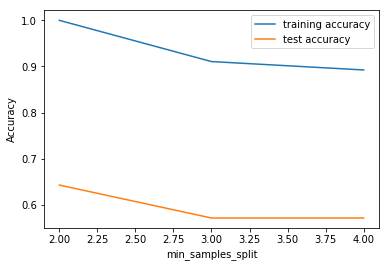

In [32]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

This shows that as you increase the min_samples_split, the tree overfits lesser since the model is less complex.

<hr>

## Grid Search to Find Optimal Hyperparameters

We can now use GridSearchCV to find multiple optimal hyperparameters together. Note that this time, we'll also specify the criterion (gini/entropy or IG).

In [33]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(1, 5, 1),
    'min_samples_leaf': range(1, 5, 1),
    'min_samples_split': range(2, 5, 1),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X,y)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:    1.9s finished
/home/laxmi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 5), 'min_samples_leaf': range(1, 5), 'min_samples_split': range(2, 5), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [34]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.002344      0.000487         0.001168        0.000346   
1        0.002359      0.000585         0.001336        0.000523   
2        0.001990      0.000767         0.001223        0.000612   
3        0.001644      0.000084         0.000875        0.000051   
4        0.001656      0.000076         0.000830        0.000038   
5        0.001698      0.000098         0.000845        0.000023   
6        0.001592      0.000028         0.000833        0.000030   
7        0.001587      0.000029         0.000805        0.000003   
8        0.001628      0.000120         0.000828        0.000028   
9        0.001613      0.000052         0.000807        0.000002   
10       0.001906      0.000287         0.000984        0.000252   
11       0.002503      0.000677         0.001049        0.000206   
12       0.001675      0.000094         0.000908        0.000082   
13       0.001611      0.000023         0.000830        0.000042   
14       0.001618      0.000043         0.000829        0.000019   
15       0.001574      0.000014         0.000816        0.000021   
16       0.001583      0.000023         0.000819        0.000006   
17       0.001599      0.000047         0.000809        0.000006   
18       0.001673      0.000127         0.000832        0.000027   
19       0.001628      0.000109         0.000810        0.000008   
20       0.001673      0.000137         0.000848        0.000064   
21       0.001584      0.000028         0.000834        0.000028   
22       0.001586      0.000030         0.000824        0.000023   
23       0.001586      0.000040         0.000876        0.000119   
24       0.001604      0.000039         0.000806        0.000004   
25       0.001578      0.000017         0.000842        0.000033   
26       0.001576      0.000011         0.000808        0.000006   
27       0.001577      0.000025         0.000811        0.000006   
28       0.001597      0.000028         0.000829        0.000044   
29       0.001628      0.000114         0.000832        0.000025   
..            ...           ...              ...             ...   
66       0.001669      0.000060         0.000828        0.000023   
67       0.001647      0.000033         0.000847        0.000051   
68       0.001670      0.000064         0.000825        0.000009   
69       0.001659      0.000091         0.000851        0.000080   
70       0.001609      0.000028         0.000816        0.000010   
71       0.001594      0.000028         0.000837        0.000047   
72       0.001604      0.000023         0.000825        0.000027   
73       0.001593      0.000023         0.000815        0.000009   
74       0.001667      0.000100         0.000822        0.000021   
75       0.001580      0.000019         0.000826        0.000028   
76       0.001615      0.000031         0.000891        0.000057   
77       0.001594      0.000031         0.000814        0.000006   
78       0.001597      0.000022         0.000820        0.000033   
79       0.001683      0.000185         0.000854        0.000062   
80       0.001924      0.000140         0.000996        0.000175   
81       0.002249      0.000372         0.001231        0.000288   
82       0.002073      0.000752         0.001381        0.001082   
83       0.001599      0.000050         0.000844        0.000047   
84       0.001612      0.000048         0.000808        0.000006   
85       0.001590      0.000043         0.000813        0.000008   
86       0.001589      0.000018         0.000820        0.000027   
87       0.001648      0.000138         0.000820        0.000017   
88       0.001586      0.000013         0.000809        0.000006   
89       0.001655      0.000175         0.000827        0.000023   
90       0.001590      0.000020         0.000846        0.000078   
91       0.001654      0.000098         0.000862        0.000059   
92       0.001641      0.000059         0.000824        0.00

In [35]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.7142857142857143
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


<hr>

**Running the model with best parameters obtained from grid search.**

In [36]:
# model with optimal hyperparameters
clf_entropy = DecisionTreeClassifier(criterion = "entropy", 
                                  max_depth=3, 
                                  min_samples_leaf=1,
                                  min_samples_split=2)
clf_entropy.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
# accuracy score
clf_entropy.score(X,y)

0.8571428571428571

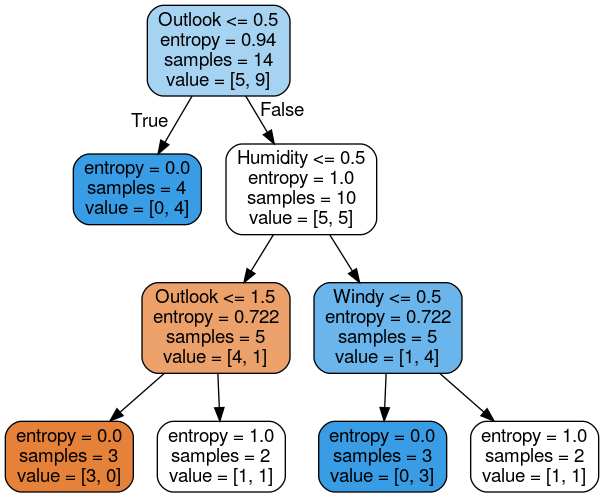

In [38]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_entropy, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

You can see that this tree is too complex to understand. Let's try reducing the max_depth and see how the tree looks.

In [39]:
# tree with max_depth = 3
clf_entropy = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=1,
                                  min_samples_split=2)
clf_entropy.fit(X, y)

# score
print(clf_entropy.score(X_test,y_test))

1.0


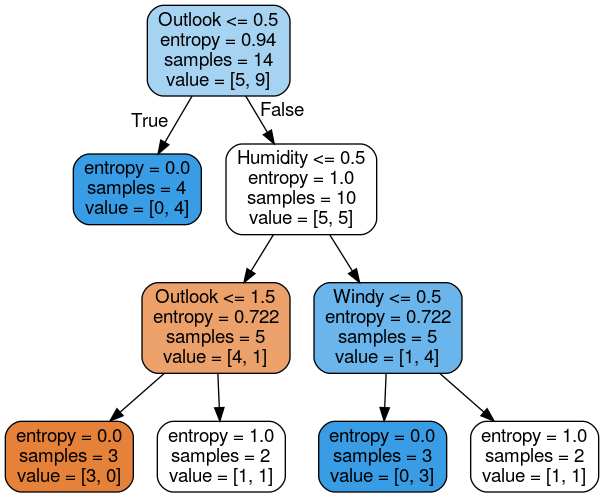

In [40]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(clf_entropy, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [41]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_entropy.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

   micro avg       1.00      1.00      1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [42]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[3 0]
 [0 2]]


In [96]:
import scipy as sc

In [98]:
# Input a pandas series 
def ent(data):
    p_data= data.value_counts()/len(data) # calculates the probabilities
    entropy=sc.stats.entropy(p_data)  # input probabilities to get the entropy 
    return entropy

In [99]:
ent(y)

0.6517565611726531

In [46]:
labels = y
from collections import Counter
from scipy import stats

stats.entropy(list(Counter(labels).values()), base=2)

0.940285958670631

In [47]:
Counter(labels).values(), labels

(dict_values([5, 9]), 0     0
 1     0
 2     1
 3     1
 4     1
 5     0
 6     1
 7     0
 8     1
 9     1
 10    1
 11    1
 12    1
 13    0
 Name: Play Golf, dtype: int64)

In [48]:
df_o_p = df.iloc[:,[0,4]]

In [49]:
df_o_p

Outlook  Play Golf
0         1          0
1         1          0
2         0          1
3         2          1
4         2          1
5         2          0
6         0          1
7         1          0
8         1          1
9         2          1
10        1          1
11        0          1
12        0          1
13        2          0

In [50]:
stats.entropy(list([5,4,5]), base=2)

1.5774062828523454

In [51]:
o = list(df.iloc[:,0])
T = list(df.iloc[:,1])
H = list(df.iloc[:,2])
W = list(df.iloc[:,3])
pg = df.iloc[:,4]
o_u = set(o)
o_c = []
for x in o_u:
    c = 0
    c = o.count(x)
    o_c.append(c)   
o_c
T_u = set(T)
T_c = []
for x in T_u:
    c = 0
    c = T.count(x)
    T_c.append(c)   
T_c
H_u = set(H)
H_c = []
for x in H_u:
    c = 0
    c = H.count(x)
    H_c.append(c)   
H_c
o_c,T_c,H_c

([4, 5, 5], [4, 4, 6], [7, 7])

In [52]:
def fun(n,z,c):
    z_u = set(z)
    l = []
    for x in z_u:
        c_0 = 0
        c_1 = 0
        for i in range(0,len(df)):
            if df.iloc[i,n] == x and df.iloc[i,4] == 0:
                c_0 = c_0 + 1
        c_1 = c[x]-c_0
        l.append((x,c_0,c_1))
    return l

In [53]:
l0 = fun(0,o,o_c)
l1 = fun(1,T,T_c)
l2 = fun(2,H,H_c)
l0, l1, l2

([(0, 0, 4), (1, 3, 2), (2, 2, 3)],
 [(0, 1, 3), (1, 2, 2), (2, 2, 4)],
 [(0, 4, 3), (1, 1, 6)])

In [54]:
def my_Ent(lst):
    print(lst)
    return stats.entropy(lst, base=2)

def Ent(data,l):
    total = 0
    for i in range(0,len(data)):
        total = total + l[i]/sum(l)* my_Ent([data[i][1],data[i][2]])
    return total
0.940 - Ent(l0,o_c)  

[0, 4]
[3, 2]
[2, 3]


0.2464638611038079

In [55]:
0.940-Ent(l1,T_c),l1,T_c

[1, 3]
[2, 2]
[2, 4]


(0.028936606988323677, [(0, 1, 3), (1, 2, 2), (2, 2, 4)], [4, 4, 6])

In [56]:
0.940-Ent(l2,H_c) ,H_c

[4, 3]
[1, 6]


(0.1515495426917105, [7, 7])

In [57]:
Counter(df_o_p)

Counter({'Outlook': 1, 'Play Golf': 1})

In [58]:
df = pd.read_csv('Weather_modified.csv')
from sklearn.preprocessing import LabelEncoder
# apply Label encoder to df_categorical

le = LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

df_o_p = df.iloc[:,[0,4]]
l = []
for x in ol_u:
    c = 0
    c = ol.count(x)
    l.append(c)   
l
l2 = []
for x in ol_u:
    c_0 = 0
    c_1 = 0
    for i in range(0,len(df_o_p)):
        if df_o_p.iloc[i,0] == x and df_o_p.iloc[i,1] == 0:
            c_0 = c_0 + 1
    c_1 = l[x]-c_0
    l2.append((x,c_0,c_1))
l2

def my_Ent(lst):
    print(lst)
    return stats.entropy(lst, base=2)

def Ent(data):
    total = 0
    for i in range(0,len(data)):
        total = total + l[i]/sum(l)* my_Ent([data[i][1],data[i][2]])
    return total
Ent(l2) 

NameError: name 'ol_u' is not defined

In [69]:
pg = df.iloc[:,4]
counts = [] 
for i in range(0,4):
    u = set(list(df.iloc[:,i]))
    c = []
    for x in u:
        cnt = 0
        cnt = list(df.iloc[:,i]).count(x)
        c.append(cnt)   
    counts.append(c)

In [80]:
#count of different values in each feature
counts

[[5, 5], [3, 2, 5], [5, 5], [6, 4]]

In [71]:
def fun(n,z,c):
    z_u = set(z)
    l = []
    for x in z_u:
        c_0 = 0
        c_1 = 0
        for i in range(0,len(df)):
            if df.iloc[i,n] == x and df.iloc[i,4] == 0:
                c_0 = c_0 + 1
        c_1 = c[x]-c_0
        l.append((x,c_0,c_1))
    return l

In [72]:
list(df.iloc[:,3])

[0, 1, 0, 0, 1, 0, 0, 0, 1, 1]

In [73]:
#when overcast is present
data = []
for i in range(0,4):
    e = fun(i,list(df.iloc[:,i]),counts[i])
    data.append(e)       
data

IndexError: list index out of range

In [94]:
#after overcast is removed

def fun(n,z,c):
    print(c)
    z_u = set(z)
    print(list(z_u))
    l = []
    ix=0
    for x in z_u:
        #print(x)
        #print(c[x])
        c_0 = 0
        c_1 = 0
        for i in range(0,len(df)):
            if df.iloc[i,n] == x and df.iloc[i,4] == 0:
                c_0 = c_0 + 1
        c_1 = c[ix]-c_0
        ix = ix + 1
        l.append((x,c_0,c_1))
    return l

data = []
for i in range(0,4):
    e = fun(i,list(df.iloc[:,i]),counts[i])
    data.append(e)       
data

[5, 5]
[1, 2]
[3, 2, 5]
[0, 1, 2]
[5, 5]
[0, 1]
[6, 4]
[0, 1]


[[(1, 3, 2), (2, 2, 3)],
 [(0, 1, 2), (1, 2, 0), (2, 2, 3)],
 [(0, 4, 1), (1, 1, 4)],
 [(0, 2, 4), (1, 3, 1)]]

In [100]:
def my_Ent(lst):
    print(lst)
    return sc.stats.entropy(lst, base=2)

def Ent(data,l):
    total = 0
    for i in range(0,len(data)):
        total = total + l[i]/sum(l)* my_Ent([data[i][1],data[i][2]])
    return total
entropies = []
for i in range(0,4):
    re = Ent(data[i],counts[i])
    entropies.append(re)
entropies
for x in entropies:
    print(0.940 - x)


[3, 2]
[2, 3]
[1, 2]
[2, 0]
[2, 3]
[4, 1]
[1, 4]
[2, 4]
[3, 1]
-0.030950594454668856
0.17903595255631877
0.21807190511263763
0.06451124978365308
